In [373]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_recall_fscore_support
import warnings
warnings.filterwarnings("ignore")

from collections import Counter

In [374]:
df = pd.read_csv("cleaned_2016_2020_enroll.csv")
print(df.shape)
df.head()

(1794, 25)


,School.Name,Total.Enrollment,X..Female,X..Male,elem,mid,high,Grade.1,Grade.2,Grade.3,...,Grade.9,Grade.10,Grade.11,Grade.12,X..Asian,X..Black,X..Hispanic,X..Multiple.Race.Categories.Not.Represented,X..White,X..Poverty
0,1,958,679,279,0,0,1,0,0,1,...,304,253,198,202,21,264,616,15,42,828
1,2,1741,135,1606,0,0,1,0,0,0,...,566,428,392,355,51,870,732,39,49,1425
2,3,7172,3614,3557,0,0,1,0,0,0,...,2923,1764,1280,1205,364,2060,4434,166,148,6098
3,4,2811,1356,1455,1,0,0,499,484,445,...,0,0,0,0,480,82,1339,87,823,1823
4,5,9896,3898,5998,0,0,1,0,0,0,...,3100,2682,2191,1923,1572,4029,2364,135,1796,7670


In [375]:
y = [0]*len(df)

for i in range(len(df)):
    prop = df.loc[i,"X..Female"]/df.loc[i,"Total.Enrollment"]
    if prop < 0.5:
        y[i] = 0
    # if prop > 0.4 and prop <= 0.5:
    #     y[i] = 2
    if prop > 0.5:
        y[i] = 1

df["y"] = y

df["y"].value_counts()

0    1159
1     635
Name: y, dtype: int64

In [376]:
cols = df.columns.tolist()
cols = cols[0:1]+cols[-1:]+cols[1:-1]

In [377]:
df = df[cols]
df.head()

,School.Name,y,Total.Enrollment,X..Female,X..Male,elem,mid,high,Grade.1,Grade.2,...,Grade.9,Grade.10,Grade.11,Grade.12,X..Asian,X..Black,X..Hispanic,X..Multiple.Race.Categories.Not.Represented,X..White,X..Poverty
0,1,1,958,679,279,0,0,1,0,0,...,304,253,198,202,21,264,616,15,42,828
1,2,0,1741,135,1606,0,0,1,0,0,...,566,428,392,355,51,870,732,39,49,1425
2,3,1,7172,3614,3557,0,0,1,0,0,...,2923,1764,1280,1205,364,2060,4434,166,148,6098
3,4,0,2811,1356,1455,1,0,0,499,484,...,0,0,0,0,480,82,1339,87,823,1823
4,5,0,9896,3898,5998,0,0,1,0,0,...,3100,2682,2191,1923,1572,4029,2364,135,1796,7670


In [378]:
def random_classifier(y_data):
    ypred=[];
    max_label=np.max(y_data); #print(max_label)
    for i in range(0,len(y_data)):
        ypred.append(int(np.floor((max_label+1)*np.random.uniform(0,1))))
    print("-----RANDOM CLASSIFIER-----")
    print("count of prediction:",Counter(ypred).values())
    print("probability of prediction:",np.fromiter(Counter(ypred).values(),dtype=float)/len(y_data))
    print("accuracy",accuracy_score(y_data, ypred))
    print("percision, recall, fscore,",precision_recall_fscore_support(y_data,ypred))

df1 = df
random_classifier(df1["y"])

-----RANDOM CLASSIFIER-----
count of prediction: dict_values([923, 871])
probability of prediction: [0.51449275 0.48550725]
accuracy 0.4882943143812709
percision, recall, fscore, (array([0.63055255, 0.33754305]), array([0.50215703, 0.46299213]), array([0.55907781, 0.39043825]), array([1159,  635], dtype=int64))


In [379]:
df1 = df1.rename(columns={"X..Multiple.Race.Categories.Not.Represented":"X..Multirace"})
df1

,School.Name,y,Total.Enrollment,X..Female,X..Male,elem,mid,high,Grade.1,Grade.2,...,Grade.9,Grade.10,Grade.11,Grade.12,X..Asian,X..Black,X..Hispanic,X..Multirace,X..White,X..Poverty
0,1,1,958,679,279,0,0,1,0,0,...,304,253,198,202,21,264,616,15,42,828
1,2,0,1741,135,1606,0,0,1,0,0,...,566,428,392,355,51,870,732,39,49,1425
2,3,1,7172,3614,3557,0,0,1,0,0,...,2923,1764,1280,1205,364,2060,4434,166,148,6098
3,4,0,2811,1356,1455,1,0,0,499,484,...,0,0,0,0,480,82,1339,87,823,1823
4,5,0,9896,3898,5998,0,0,1,0,0,...,3100,2682,2191,1923,1572,4029,2364,135,1796,7670
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1789,1790,1,2267,2267,0,0,1,1,0,0,...,422,276,190,122,61,772,1368,40,26,1956
1790,1791,1,2848,2848,0,0,1,1,0,0,...,419,397,391,383,987,202,1165,26,468,2360
1791,1792,1,2788,2788,0,0,1,1,0,0,...,426,400,376,365,1000,1211,340,167,70,2117
1792,1793,1,428,235,193,0,0,0,163,56,...,0,0,0,0,2,184,237,3,2,375


In [380]:
elem = df1.loc[df1["elem"]==1,"Grade.1":"Grade.5"]
elem["y"] = df1.loc[df1["elem"]==1,"y"]
elem["Total"] = df1.loc[df1["elem"]==1,"Total.Enrollment"]
elem = elem.reset_index(drop=True)
elem

,Grade.1,Grade.2,Grade.3,Grade.4,Grade.5,y,Total
0,499,484,445,383,365,0,2811
1,211,188,157,154,167,1,1698
2,271,272,281,284,293,1,2602
3,332,371,353,359,354,1,2183
4,487,484,492,479,506,1,4059
...,...,...,...,...,...,...,...
898,196,132,107,67,31,0,4135
899,374,369,378,389,384,1,2509
900,459,402,387,402,407,0,2714
901,368,379,399,427,429,0,2561


In [381]:
mid = df1.loc[df1["mid"]==1,"Grade.6":"Grade.8"]
mid["y"] = df1.loc[df1["mid"]==1,"y"]
mid["Total"] = df1.loc[df1["mid"]==1,"Total.Enrollment"]
mid = mid.reset_index(drop=True)
mid

,Grade.6,Grade.7,Grade.8,y,Total
0,176,198,170,1,1698
1,209,225,246,0,1991
2,61,123,168,0,352
3,605,724,699,0,2028
4,349,346,344,1,2789
...,...,...,...,...,...
646,262,263,270,1,2408
647,260,239,239,1,1942
648,445,413,399,1,2267
649,443,412,403,1,2848


In [382]:
high = df1.loc[df1["high"]==1,"Grade.9":"Grade.12"]
high["y"] = df1.loc[df1["high"]==1,"y"]
high["Total"] = df1.loc[df1["high"]==1,"Total.Enrollment"]
high = high.reset_index(drop=True)
high

,Grade.9,Grade.10,Grade.11,Grade.12,y,Total
0,304,253,198,202,1,958
1,566,428,392,355,0,1741
2,2923,1764,1280,1205,1,7172
3,3100,2682,2191,1923,0,9896
4,719,715,679,652,1,2765
...,...,...,...,...,...,...
559,408,412,399,394,1,2408
560,380,300,267,257,1,1942
561,422,276,190,122,1,2267
562,419,397,391,383,1,2848


In [383]:
from sklearn.model_selection import train_test_split as tts
X_train, X_test, y_train, y_test = tts(mid.loc[:,mid.columns!="y"], mid["y"], test_size=0.2)


# from sklearn.preprocessing import StandardScaler
# scale = StandardScaler()
X_train = (X_train.loc[:,X_train.columns!="Total"].div(X_train.Total,axis=0))
# X_train = scale.fit_transform(X_train)
X_test = (X_test.loc[:,X_test.columns!="Total"].div(X_test.Total,axis=0))
# X_test = scale.fit_transform(X_test)

In [384]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
def confusion_plot(y_data,y_pred):

    print("ACCURACY: " + str(sum(y_pred==y_data)/len(y_data)))
    print("NEGATIVE RECALL (Y=0): " + str(sum((y_pred==0)&(y_data==0))/sum(y_data==0)))
    print("NEGATIVE PRECISION (Y=0): " + str(sum((y_pred==0)&(y_data==0))/sum(y_pred==0)))
    print("POSITIVE RECALL (Y=1): " + str(sum((y_pred==1)&(y_data==1))/sum(y_data==1)))
    print("POSITIVE PRECISION (Y=1): " + str(sum((y_pred==1)&(y_data==1))/sum(y_pred==1)))
    cm = confusion_matrix(y_data, y_pred, labels=clf.classes_)
    print(cm)

    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
    disp.plot()
    plt.show()

In [385]:
test_results=[]
train_results=[]

for num_layer in range(1,20):
    model = tree.DecisionTreeClassifier(max_depth=num_layer)
    model = model.fit(X_train, y_train)

    yp_train=model.predict(X_train)
    yp_test=model.predict(X_test)

    # print(y_pred.shape)
    test_results.append([num_layer,accuracy_score(y_test, yp_test),recall_score(y_test, yp_test,pos_label=0),
    recall_score(y_test, yp_test,pos_label=1)])
    train_results.append([num_layer,accuracy_score(y_train, yp_train),recall_score(y_train, yp_train,pos_label=0),
    recall_score(y_train, yp_train,pos_label=1)])

Text(0.5, 1.0, 'Accuracy (Y=0) vs. Max_depth in DT model')

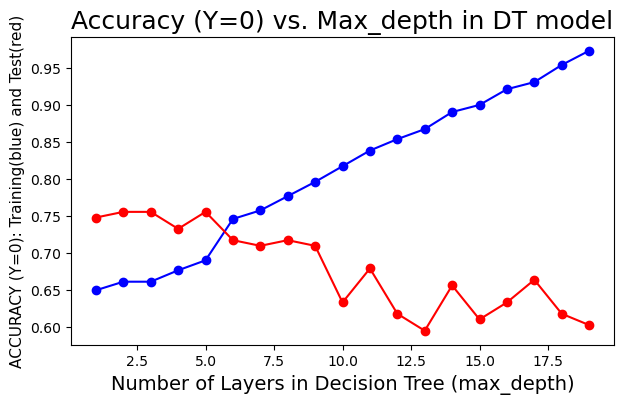

In [392]:
fig, ax1 = plt.subplots(figsize=(7,4))
ax1.plot([i[0] for i in train_results], [j[1] for j in train_results], "b-o")
ax1.plot([i[0] for i in test_results], [j[1] for j in test_results], "r-o")
ax1.set_xlabel("Number of Layers in Decision Tree (max_depth)", fontsize=14)
ax1.set_ylabel("ACCURACY (Y=0): Training(blue) and Test(red)", fontsize=11)
ax1.set_title("Accuracy (Y=0) vs. Max_depth in DT model",fontsize=18)

------TRAINING------
ACCURACY: 0.6903846153846154
NEGATIVE RECALL (Y=0): 1.0
NEGATIVE PRECISION (Y=0): 0.6773547094188377
POSITIVE RECALL (Y=1): 0.11538461538461539
POSITIVE PRECISION (Y=1): 1.0
[[338   0]
 [161  21]]


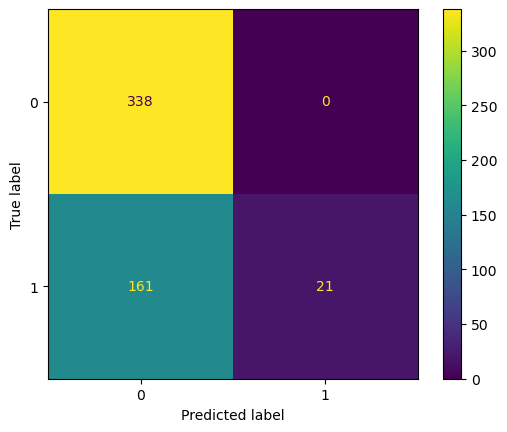

------TEST------
ACCURACY: 0.7557251908396947
NEGATIVE RECALL (Y=0): 0.9897959183673469
NEGATIVE PRECISION (Y=0): 0.7578125
POSITIVE RECALL (Y=1): 0.06060606060606061
POSITIVE PRECISION (Y=1): 0.6666666666666666
[[97  1]
 [31  2]]


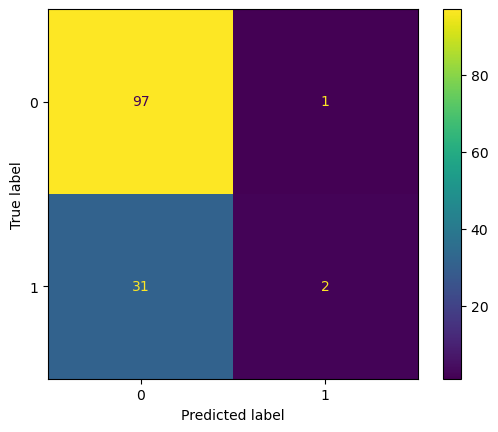

In [389]:
model = tree.DecisionTreeClassifier(max_depth=5)
model = model.fit(X_train, y_train)

yp_train=model.predict(X_train)
yp_test=model.predict(X_test)

print("------TRAINING------")
confusion_plot(y_train,yp_train)
print("------TEST------")
confusion_plot(y_test,yp_test)

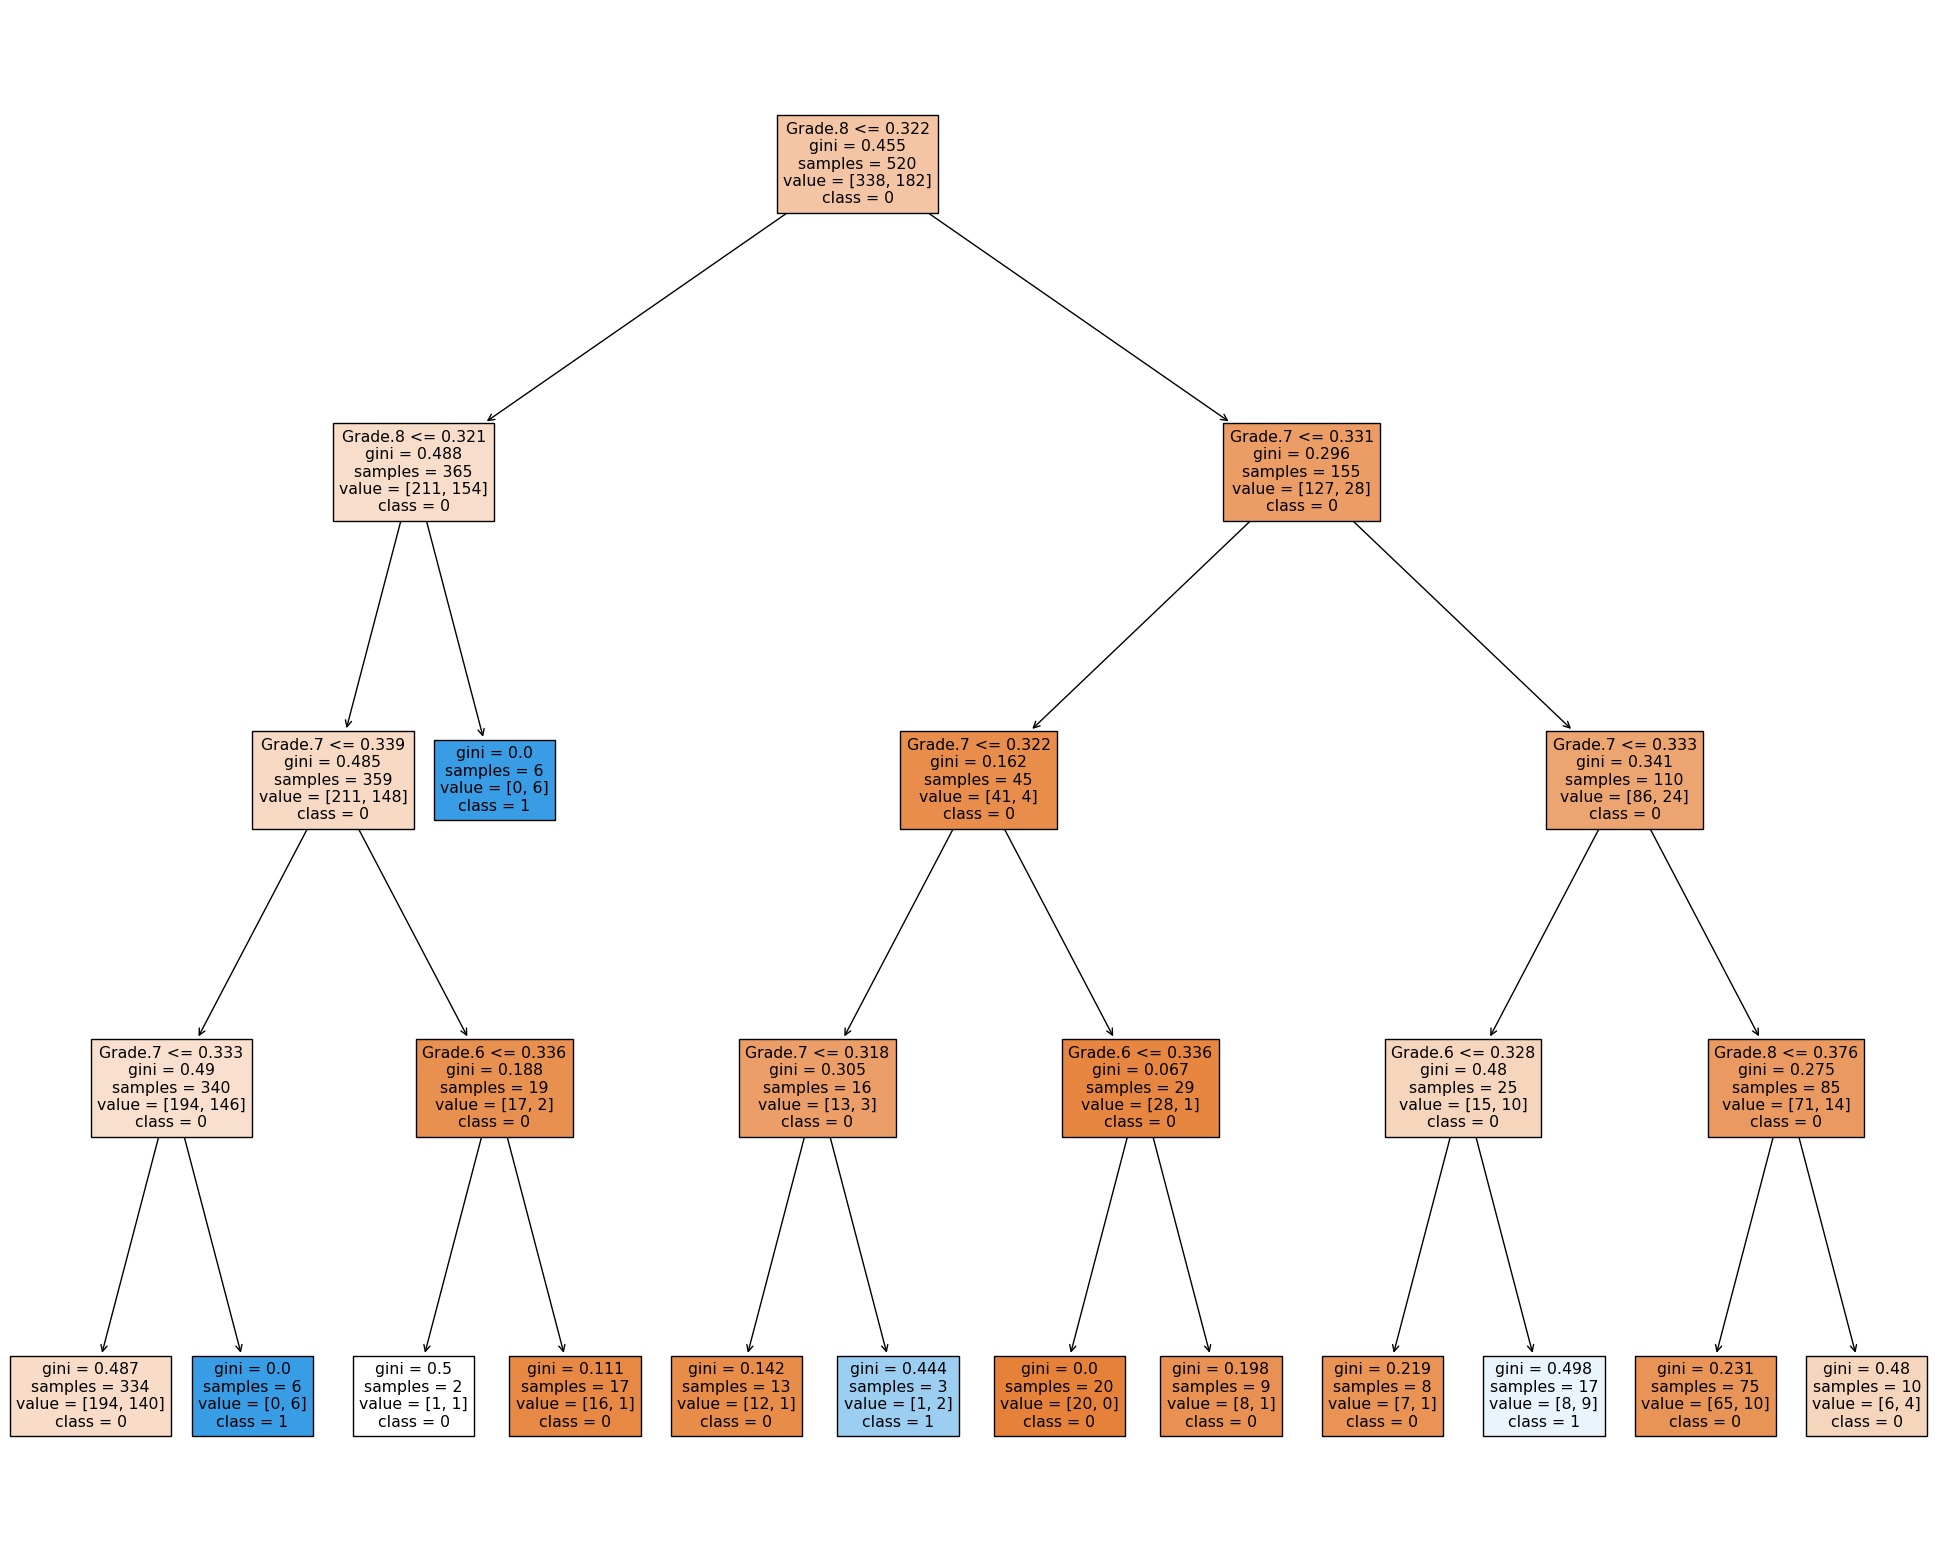

In [388]:
fig = plt.figure(figsize=(25,20))
def plot_tree(model,X,Y):
    tree_plot = tree.plot_tree(model, feature_names=X_train.columns, class_names=["0","1"], filled=True)
    plt.show()
plot_tree(model,X_train,y_train)

Text(0.5, 1.0, 'Accuracy (Y=0) vs. Max_depth in DT model')

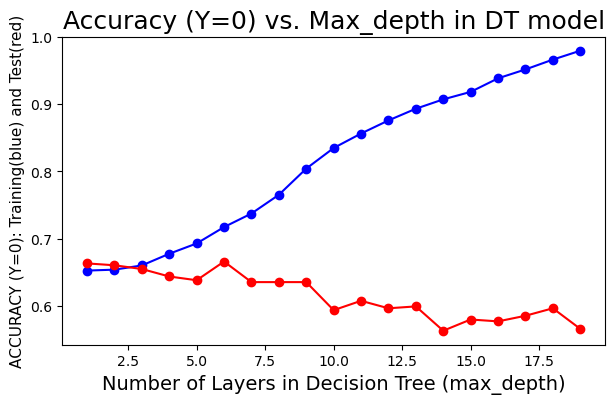

In [410]:
races = df1.loc[:,"X..Asian":"X..White"]
races["y"] = df1["y"]
races["Total"] = df1["Total.Enrollment"]

X_train, X_test, y_train, y_test = tts(races.loc[:,races.columns!="y"], races["y"], test_size=0.2)
X_train = (X_train.loc[:,X_train.columns!="Total"].div(X_train.Total,axis=0))
X_test = (X_test.loc[:,X_test.columns!="Total"].div(X_test.Total,axis=0))

test_results=[]
train_results=[]
for num_layer in range(1,20):
    model = tree.DecisionTreeClassifier(max_depth=num_layer)
    model = model.fit(X_train, y_train)

    yp_train=model.predict(X_train)
    yp_test=model.predict(X_test)

    # print(y_pred.shape)
    test_results.append([num_layer,accuracy_score(y_test, yp_test),recall_score(y_test, yp_test,pos_label=0),
    recall_score(y_test, yp_test,pos_label=1)])
    train_results.append([num_layer,accuracy_score(y_train, yp_train),recall_score(y_train, yp_train,pos_label=0),
    recall_score(y_train, yp_train,pos_label=1)])

fig, ax1 = plt.subplots(figsize=(7,4))
ax1.plot([i[0] for i in train_results], [j[1] for j in train_results], "b-o")
ax1.plot([i[0] for i in test_results], [j[1] for j in test_results], "r-o")
ax1.set_xlabel("Number of Layers in Decision Tree (max_depth)", fontsize=14)
ax1.set_ylabel("ACCURACY (Y=0): Training(blue) and Test(red)", fontsize=11)
ax1.set_title("Accuracy (Y=0) vs. Max_depth in DT model",fontsize=18)

------TEST------
ACCURACY: 0.6713091922005571
NEGATIVE RECALL (Y=0): 0.9414225941422594
NEGATIVE PRECISION (Y=0): 0.6838905775075987
POSITIVE RECALL (Y=1): 0.13333333333333333
POSITIVE PRECISION (Y=1): 0.5333333333333333
[[225  14]
 [104  16]]


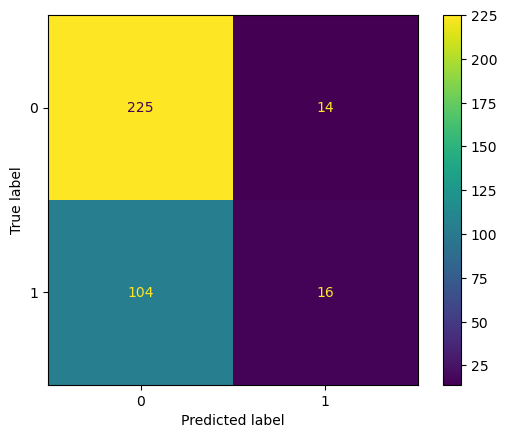

In [411]:
model = tree.DecisionTreeClassifier(max_depth=6)
model = model.fit(X_train, y_train)

yp_train=model.predict(X_train)
yp_test=model.predict(X_test)

print("------TEST------")
confusion_plot(y_test,yp_test)